In [1]:
# Import necessary libraries
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', color_codes = True)

from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the Iris dataset from sklearn
# Load the Iris dataset from sklearn
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

data['target'] = iris.target

In [3]:
# Creating a new Pandas Series with target names
df_target = iris.target_names[iris.target]
print(df_target)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

In [16]:
# Splitting the data into features (X) and target (Y)

X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target variable (0: Setosa, 1: Versicolour, 2: Virginica)

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [21]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Logistic Regression model: {accuracy:.2f}")

Accuracy of the Logistic Regression model: 1.00


In [22]:
model.score(X_train, y_train)

0.9666666666666667

In [23]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [24]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

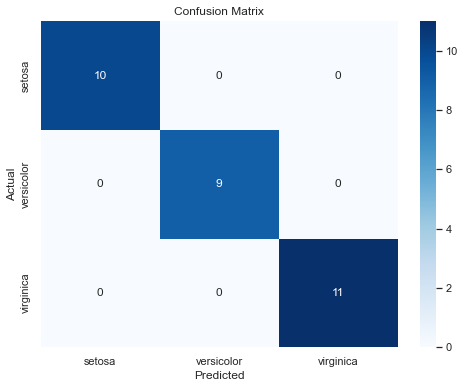

In [25]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [26]:
# Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print(class_report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



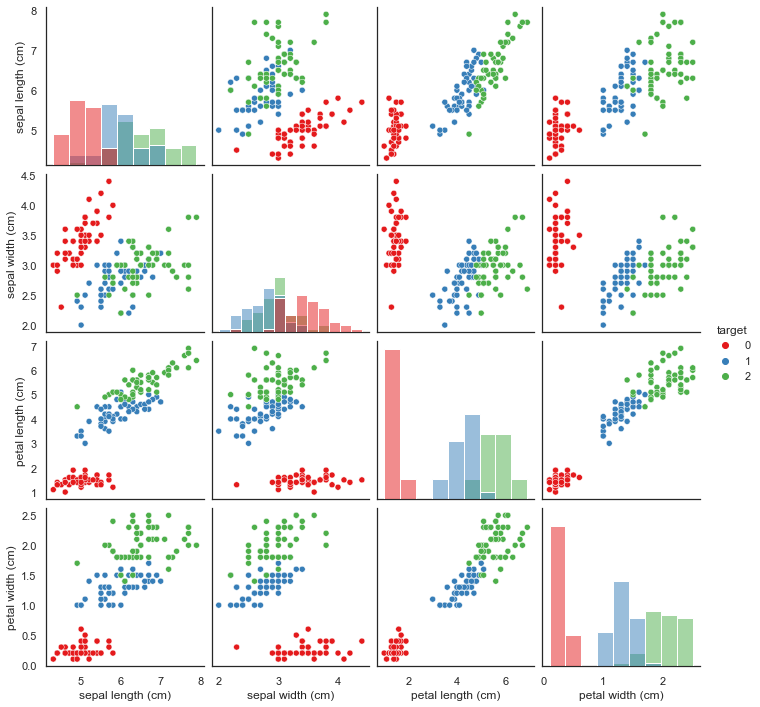

In [27]:
# Visualize the Iris dataset
sns.pairplot(data=data, hue='target', diag_kind='hist', palette='Set1')
plt.show()